# Анализ интернет-магазина

Данный проект предполагает проверку гипотез, составленных маркетинговым отделом, которые направлены на повышение выручки.

**Цель проекта**

Приоритизировать гипотезы и проверить результаты А/В теста.

**План работы:**

1. Загрузить и изучать данные
2. Провести предобработку
3. Приоритизировать гипотезы
4. Проанализировать результат А/В теста

Входные данные - `3 датасета с гипотезами и данными по группам А и В`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Загрузка данных

In [ ]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    print('hypothesis error')

try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    print('orders error')

try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    print('visitors error')

pd.options.display.max_colwidth = 120
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
hypothesis.info()
print()
print()
orders.info()
print()
print()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 

In [ ]:
print(visitors['date'].min())
print(visitors['date'].max())
print(len(orders['transactionId'].unique()))
print(orders['date'].min())
print(orders['date'].max())

2019-08-01
2019-08-31
1197
2019-08-01
2019-08-31


**Вывод**

В данных представлено 9 гипотез с 4-я параметрами для их приоритизации, почти 1200 транзакциЙ с группами и столько же уникальных пользователей, промежуток проведения эксперимента - август.

## Предобработка данных

In [ ]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
orders = orders.rename(columns={
    'transactionId': 'transaction_id',
    'visitorId': 'visitor_id'
})

hypothesis['hypothesis'] = hypothesis['hypothesis'].str.lower()

orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [ ]:
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
display(orders.head(5))
display(visitors.head(5))

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
print(orders['group'].unique())
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


In [ ]:
print(len(orders.query('group == "A"')))
print(len(orders.query('group == "B"')))
print(len(visitors.query('group == "A"')))
print(len(visitors.query('group == "B"')))

557
640
31
31


In [ ]:
print(orders['revenue'].describe().apply("{0:.0f}".format))
print(visitors['visitors'].describe().apply("{0:.0f}".format))

count       1197
mean        8348
std        39191
min           50
25%         1220
50%         2978
75%         8290
max      1294500
Name: revenue, dtype: object
count     62
mean     607
std      114
min      361
25%      534
50%      624
75%      710
max      770
Name: visitors, dtype: object


In [ ]:
len(orders[orders['revenue'] > 50000])

21

**Вывод**

- Привели названия колонок в таблицах и ячейки с названиями гипотез к нормальному типу
- Проверили уникальные значения
- Посмотрели количество строк для каждой группы
- Проверили аномальные значения, есть выбросы в суммах заказа. Больше 21 заказа свыше 50 000.

## Приоритизация гипотез

In [ ]:
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [ ]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(round(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False), 2))

,hypothesis,ICE
8,"запустить акцию, дающую скидку на товар в день рождения",16.20
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [ ]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"запустить акцию, дающую скидку на товар в день рождения",16.2
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [ ]:
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [ ]:
hyp = hypothesis[hypothesis['reach'] == 10]['hypothesis']
print("\n".join(hyp.to_list()))

добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


**Вывод**

Для А/В теста возьмём гипотезу под номером 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Решающим фактором для определия гипотезы для проверка стал охват, он самый большой именно в данном случае.

Также для проведения теста можно рассмотреть гипотезу под номером 0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

## Анализ A/B теста

### Кумулятивная выручка по группам за каждую дату

In [ ]:
# Создадим массив уникальных пар значений дат и групп теста

datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups['date'] = pd.to_datetime(datesGroups['date'])

# Соберём агрегированные кумулятивные по дням данные о заказах

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ), axis=1,
).sort_values(by=['date', 'group'])

# Соберём агрегированные кумулятивные по дням данные о посетителях

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max',
        'visitors': 'sum'
    }
    ), axis=1,
).sort_values(by=['date', 'group'])

# Объединяем кумулятивные данные в одной таблице

cumulativeData = ordersAggregated.merge(visitorsAggregated,
                                        left_on=['date', 'group'],
                                        right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))
print()
print(cumulativeData['date'].min())
print(cumulativeData['date'].max())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845



2019-08-01 00:00:00
2019-08-31 00:00:00


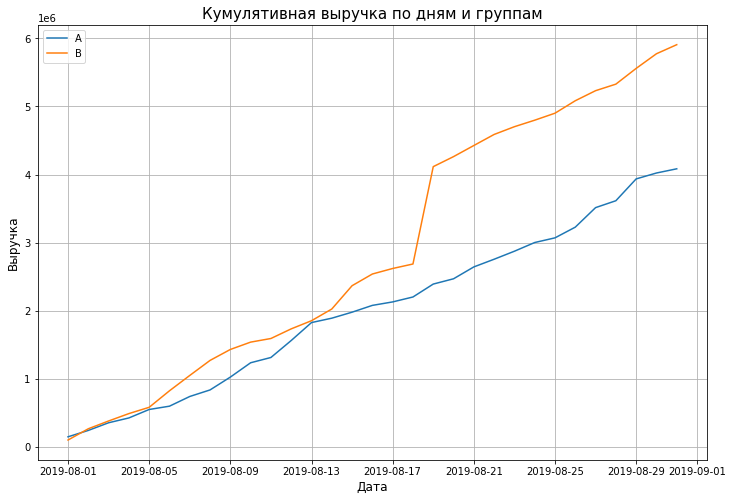

In [ ]:
# Собираем датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням и по группам

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# Строим графики выручки

plt.figure(figsize=(12, 8))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням и группам', size=15)
plt.xlabel('Дата', size=12)
plt.ylabel('Выручка', size=12)
plt.legend()
plt.grid()

plt.show()

**Вывод**

Выручка увеличивается на протяжении всего теста, что уже является хорошим знаком. Обе группы идут более менее ровно, но у группы В произошёл скачок примерно 18 числа, что связано скорее всего с увеличением количества заказов или аномально больших сумм.

### Кумулятивный средний чек по группам на каждую дату

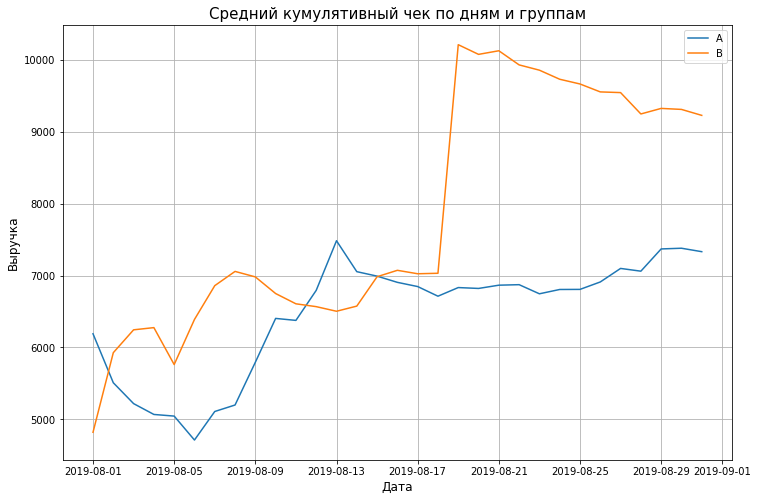

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

plt.title('Средний кумулятивный чек по дням и группам', size=15)
plt.xlabel('Дата', size=12)
plt.ylabel('Выручка', size=12)
plt.legend()
plt.grid()

plt.show()

**Вывод**

- График среднего чека по группам не имеет стабильности (по крайней мере до первой половины): есть сильные подъёмы и снижения.
- Как и на графике общей выручки, присутствует значительное увеличение у группы В 18 числа
- На конец теста у группы А идёт небольшой рост, а у В снижение

### Относительное изменение кумулятивного среднего чека группы В к группе А

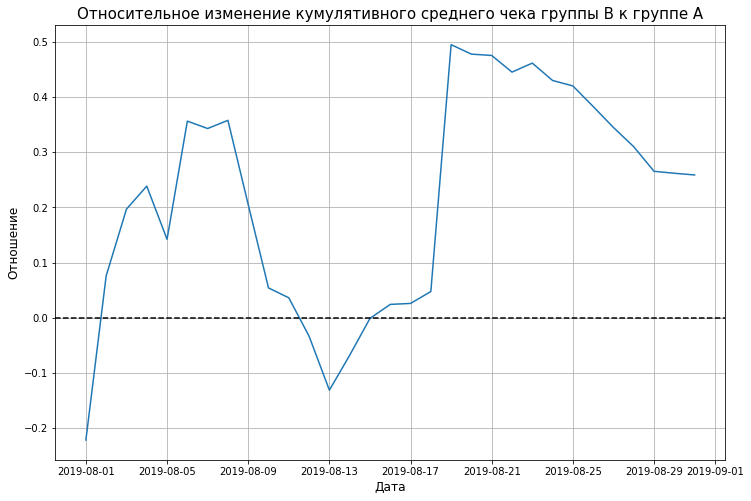

In [ ]:
# Cобираем данные в одном датафрейме

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date',
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])

# Строим отношение средних чеков

plt.figure(figsize=(12, 8))

plt.plot(mergedCumulativeRevenue['date'],
        ((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])) - 1,)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А', size=15)
plt.xlabel('Дата', size=12)
plt.ylabel('Отношение', size=12)
plt.grid()

plt.show()

**Вывод**

БОльшую часть эксперимента средний чек в группе В больше, но график очень сильно видоизменяется, скорее всего из-за аномальных значений.

### Кумулятивное среднее количество заказов на посетителя по группам

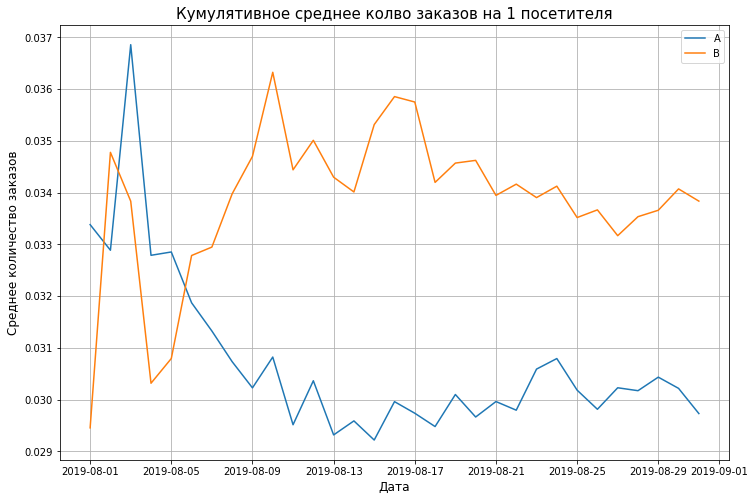

In [ ]:
cumulativeA = cumulativeData[cumulativeData['group']=='A'][['date', 'orders', 'visitors']]
cumulativeB = cumulativeData[cumulativeData['group']=='B'][['date', 'orders', 'visitors']]

# Кумулятивное среднее количество заказов на 1 посетителя по группам

cumulativeOrdersMeanA = cumulativeA['orders'] / cumulativeA['visitors']
cumulativeOrdersMeanB = cumulativeB['orders'] / cumulativeB['visitors']

plt.figure(figsize=(12, 8))

plt.plot(cumulativeA['date'], cumulativeOrdersMeanA, label='A')
plt.plot(cumulativeB['date'], cumulativeOrdersMeanB, label='B')

plt.title('Кумулятивное среднее колво заказов на 1 посетителя', size=15)
plt.xlabel('Дата', size=12)
plt.ylabel('Среднее количество заказов', size=12)
plt.legend()
plt.grid()

plt.show()

**Вывод**

- Заметны резки колебания графиков в первую неделю, на это могла повлиять неправильно выбранная выборка по итогам А/А тест либо внешние факторы
- Группа В после 1 недели стабильно выше группы А
- Обе группы имеют примерно одинаковую тенденцию на подъём и снижение заказов

### Относительное изменение кумулятивного среднего количества заказов группы В к группе А

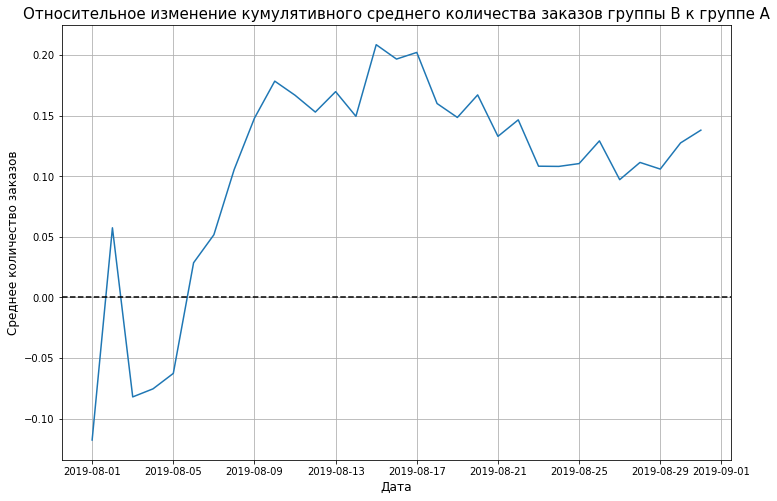

In [ ]:
# Соединяем кумулятивные таблицы по группам

mergedOrders = cumulativeA.merge(cumulativeB, left_on='date', right_on='date', suffixes=['A', 'B'])

# Кумулятивное среднее количество заказов на 1 посетителя по группам

plt.figure(figsize=(12, 8))

plt.plot(mergedOrders['date'],
        ((mergedOrders['ordersB']/mergedOrders['visitorsB']) / (mergedOrders['ordersA']/mergedOrders['visitorsA']) - 1))

plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительное изменение кумулятивного среднего количества заказов группы В к группе А', size=15)
plt.xlabel('Дата', size=12)
plt.ylabel('Среднее количество заказов', size=12)
plt.grid()

plt.show()

**Вывод**

Динамика примерно совпадает с предыдущим графиком, идёт резкий рост после 1-ой недели и небольшое снижение под конец периода.

### Количество заказов по пользователям

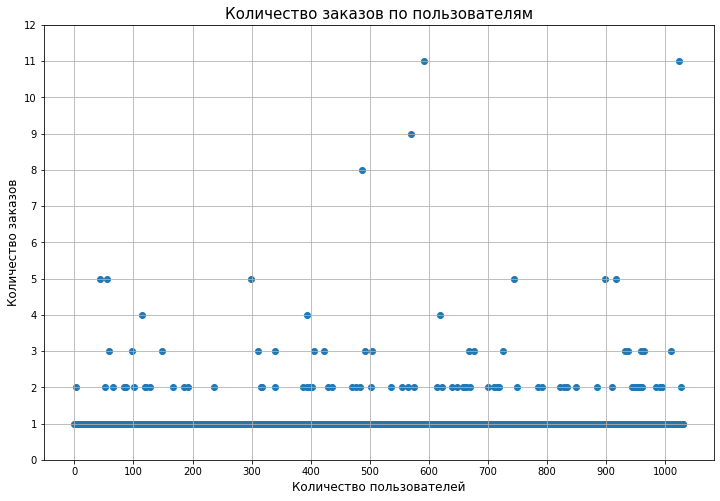

In [ ]:
#

ordersByUser = orders.groupby('visitor_id')\
                      .agg({'transaction_id': 'count'})\
                      .rename(columns={'transaction_id': 'cnt_order'})\
                      .reset_index()

#

x_values = pd.Series(range(0, len(ordersByUser['cnt_order'])))

plt.figure(figsize=(12, 8))

plt.scatter(x_values, ordersByUser['cnt_order'])

plt.title('Количество заказов по пользователям', size=15)
plt.xlabel('Количество пользователей', size=12)
plt.ylabel('Количество заказов', size=12)
plt.xticks(np.arange(min(x_values), max(x_values), 100))
plt.yticks(np.arange(min(ordersByUser['cnt_order']) - 1, max(ordersByUser['cnt_order']) + 2, 1))
plt.grid()

plt.show()

**Вывод**

Предположение подтвердилось, есть аномальные выбросы в виде 8-11 заказов за месяц. Основная часть будет располагаться до 3 заказов примерно.

### 95-ый и 99-ый персентили заказов на пользователя

In [ ]:
np.percentile(ordersByUser['cnt_order'], [95, 97.5, 99])

array([2., 3., 4.])

**Вывод**

Возьмём за границу - 3 заказа, что соответствует 97.5 персентилю.

### Стоимость заказов

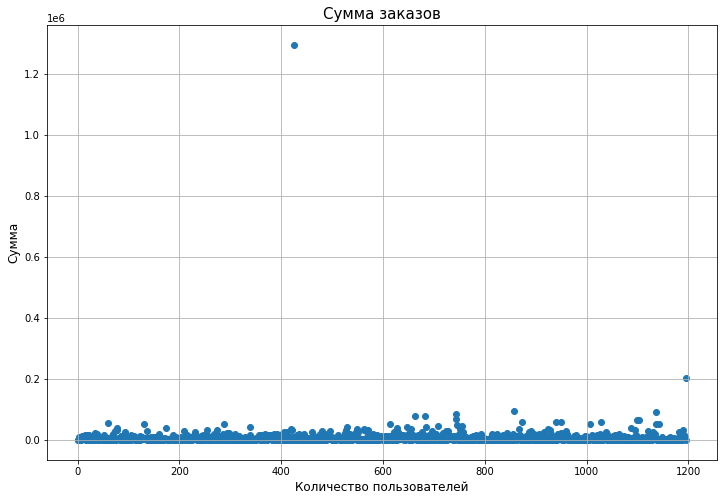

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12, 8))

plt.scatter(x_values, orders['revenue'])

plt.title('Сумма заказов', size=15)
plt.xlabel('Количество пользователей', size=12)
plt.ylabel('Сумма', size=12)
plt.grid()

plt.show()

**Вывод**

Присутствует аномальные значение, которые скорее всего и давали сильный рост в категории В. Отсекать надо всё, что больше 150 000 рублей за заказ.

### 95-ый и 99-ый персентили стоимости заказов

In [ ]:
np.percentile(orders['revenue'], [95, 97.5, 99])

array([28000. , 39530. , 58233.2])

**Вывод**

Если округлить, то можно отсекать заказы дороже 40 000.

### Стат значимость среднего количества заказов на посетителя по группам по "сырым" данным

`H0:` среднее количество заказов на посетителя по группам по "сырым" данным не различается

`H1:` среднее количество заказов на посетителя по группам по "сырым" данным различается

In [ ]:
# Таблицы с пользователями, совершившими хотя бы 1 заказ, и числом заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

In [ ]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(
         0,
         index=np.arange(
             cumulativeData[cumulativeData['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
         ), name='orders'
     )
    ], axis=0
)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(
         0,
         index=np.arange(
             cumulativeData[cumulativeData['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
         ), name='orders')
    ], axis=0
)

#

alpha = 0.05

pvalue1 = float("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
pvalue2 = float("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

if pvalue1 < alpha:
    print('Отвергаем нулевую гипотезу, pvalue1={}'.format(pvalue1))
else:
    print('Нет оснований отвергнуть нулевую гипотезу, pvalue1={}'.format(pvalue1))

if pvalue2 < alpha:
    print('Относительный прирост группы В к группе А < уровня значимости, pvalue2={}'.format(pvalue2))
else:
    print('Относительный прирост группы В к группе А => уровня значимости, pvalue2={}'.format(pvalue2))

Отвергаем нулевую гипотезу, pvalue1=0.015
Относительный прирост группы В к группе А => уровня значимости, pvalue2=0.144


**Вывод**

По итогу отвергаем нулевую гипотезу, потому что p_value меньше заданного уровня стат значимости, поэтому различия в выборках имеют значимый характер. Разница в средних заказах на пользователя присутствует.

Относительный прирост заказов в группе В по отношению к А составляет 14,4%.

### Стат значимость различий в среднем чеке заказа между группами по «сырым» данным

`H0:` средняя сумма чека заказа группам по "сырым" данным не различается

`H1:` средняя сумма чека заказа группам по "сырым" данным различается

In [ ]:
sampleA = orders[orders['group'] == 'A']['revenue']
sampleB = orders[orders['group'] == 'B']['revenue']

pvalue1 = float("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
pvalue2 = float("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

if pvalue1 < alpha:
    print('Отвергаем нулевую гипотезу, pvalue1={}'.format(pvalue1))
else:
    print('Нет оснований отвергнуть нулевую гипотезу, pvalue1={}'.format(pvalue1))

if pvalue2 < alpha:
    print('Относительный прирост группы В к группе А < уровня значимости, pvalue2={}'.format(pvalue2))
else:
    print('Относительный прирост группы В к группе А => уровня значимости, pvalue2={}'.format(pvalue2))

Нет оснований отвергнуть нулевую гипотезу, pvalue1=0.729
Относительный прирост группы В к группе А => уровня значимости, pvalue2=0.259


**Вывод**

Нулевую гипотезу о том, что разница в среднем чеке по группам не отличается, не отвергаем.

Прирост среднего чека группы В составляет 25,9%.

### Стат значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

`H0:` среднее количество заказов на посетителя по "очищенным" данным не различается

`H1:` среднее количество заказов на посетителя по "очищенным" данным различается

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(f'В данных {abnormalUsers.shape[0]} аномальных user_id')

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
dtype: int64
В данных 34 аномальных user_id


In [ ]:
# Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным

sampleAFiltered = pd.concat(
    [ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'A']['visitors'].max() - len(ordersByUsersA['orders'])
            ), name='orders',
        ),
    ], axis=0,
)

sampleBFiltered = pd.concat(
    [ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'B']['visitors'].max() - len(ordersByUsersB['orders'])
            ), name='orders',
        ),
    ], axis=0,
)

pvalue1 = float("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
pvalue2 = float("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

if pvalue1 < alpha:
    print('Отвергаем нулевую гипотезу, pvalue1={}'.format(pvalue1))
else:
    print('Нет оснований отвергнуть нулевую гипотезу, pvalue1={}'.format(pvalue1))

if pvalue2 < alpha:
    print('Относительный прирост группы В к группе А < уровня значимости, pvalue2={}'.format(pvalue2))
else:
    print('Относительный прирост группы В к группе А => уровня значимости, pvalue2={}'.format(pvalue2))

Отвергаем нулевую гипотезу, pvalue1=0.009
Относительный прирост группы В к группе А => уровня значимости, pvalue2=0.164


**Вывод**

Отвергаем нулевую гипотезу, данные статистически значимы, результат особо не изменился после очищения данных.

Относительный прирост В по отношению к А увеличился примерно на 3% до 16,4%.

### Стат значимость различий в среднем чеке заказа между группами по «очищенным» данным

`H0:` средняя сумма чека заказа группам по "очищенным" данным не различается

`H1:` средняя сумма чека заказа группам по "очищенным" данным различается

In [ ]:
sampleAFiltered = orders[np.logical_not(orders['visitor_id'].isin(abnormalUsers)) & (orders['group'] == 'A')]['revenue']

sampleBFiltered = orders[np.logical_not(orders['visitor_id'].isin(abnormalUsers)) & (orders['group'] == 'B')]['revenue']

pvalue1 = float("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
pvalue2 = float("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

if pvalue1 < alpha:
    print('Отвергаем нулевую гипотезу, pvalue1={}'.format(pvalue1))
else:
    print('Нет оснований отвергнуть нулевую гипотезу, pvalue1={}'.format(pvalue1))

if pvalue2 < alpha:
    print('Относительный прирост группы В к группе А < уровня значимости, pvalue2={}'.format(pvalue2))
else:
    print('Относительный прирост группы В к группе А => уровня значимости, pvalue2={}'.format(pvalue2))

Нет оснований отвергнуть нулевую гипотезу, pvalue1=0.711
Относительный прирост группы В к группе А => уровня значимости, pvalue2=0.06


**Вывод**

Различий в значимости среднего чека заказа по "сырым" и "очищенным" данным почти нет, p_value составляет чуть больше 70%.

Относительный прирост группы В уменьшился до 6%.

# Общий вывод

Задачей проекта было определение приоритетной гипотезы и анализ результатов А/В теста.

**Этапы проекта:**

1. Изучение датафрейма
 - Выгрузка
 - Просмотр общей информации


2. Предобработка данных
 - Преобразовали типы данных в столбце
 - Изменили название колонок
 - Проверили уникальные и аномальные значения


3. Приоритизация гипотез


4. Анализ А/В теста


5. Общий вывод

**В результате анализа А/В теста были сделаны следующие выводы:**

- Выручка увеличивается на протяжении всего теста, у группы В больше на конец
- Средний чек сильно меняется, группа В больше
- Количество заказов сильно меняются в первую неделю, а затем стабилизируются и имеют похожую динамику. Группа В больше А
- В данных есть аномальные заказы среди которых 8, 9 и 11 заказов за месяц
- Присутствуют сильные выбросы и по цене заказа, но 97,5% всех заказов доходят максимум до 39 500

**Итоги теста**

Стат значимость среднего чека "сырых" и "очищенных" данных `уменьшилась с 72.9% до 71.1%`

Относительный прирост среднего чека группы В к группе А `уменьшился с 26% до 6%`


Стат значимость среднего количество заказов "сырых" и "очищенных" `данных уменьшилась с 1.7% до 0.9%`

Относительный прирост среднего числа заказов группы В к группе А `увеличился с 13.8% до 16.4%`

Выручка группы В увеличивается больше, чем группы А благодаря росту среднего количества заказов, но средний чек остался примерно одинаковым.

**Тест нужно остановить и признать успешным**